In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
%cd /content/drive/MyDrive/digit-recognizer

/content/drive/MyDrive/digit-recognizer


In [ ]:
df =  pd.read_csv("train.csv")

In [ ]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = np.array(df.iloc[: , 1:] / 255)

In [ ]:
Y = np.array(df.iloc[: ,0])

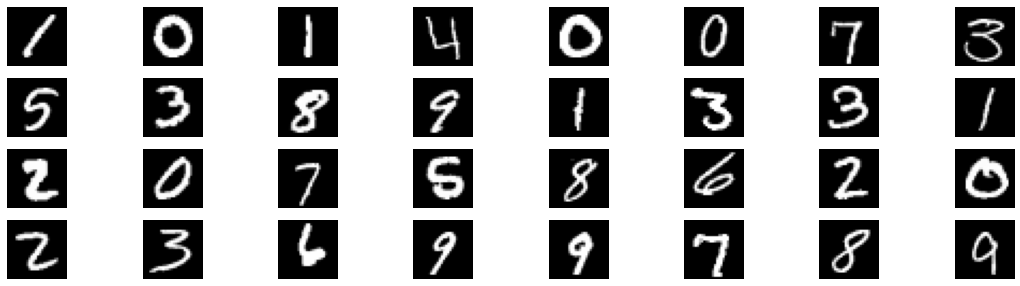

In [ ]:
plt.figure(figsize= (19 , 5))
for i in range(32):
    plt.subplot(4 , 8 , i+1)
    plt.imshow(X[i].reshape((28 , 28)), cmap = "gray")
    plt.axis("off")

In [ ]:
xtrain , xtest , ytrain , ytest = train_test_split(X , Y , test_size = 0.2)

## one hot encoding ytrain and ytest for softmax

In [ ]:
ytrain_ind = np.array(pd.get_dummies(ytrain))
ytest_ind = np.array(pd.get_dummies(ytest))

# Decode dummies

In [ ]:
def decode_dummies(x):
    return np.argmax(x , axis = 1)

# code for ANN

## Activation functions

In [ ]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def relu(x):
    return (x * (x > 0))

def softmax(x):
    expA = np.exp(x)
    return (expA / expA.sum(axis = 1 , keepdims = True))

## Forward propagation

In [ ]:
def forward(x , W1 , W2 ,b1 ,b2):
    z = relu((x.dot(W1) + b1))
    # z = sigmoid((x.dot(W1) + b1)) #sigmoid
    # z = np.tanh((x.dot(W1) + b1)) #tanh
    return z , softmax(z.dot(W2) + b2)

## Derivative of loss function with respect to W2 , b2 , W1 , b1

In [ ]:
def derivative_W2(true_t , y , z):
    return (z.T.dot(y - true_t))

def derivative_b2(true_t , y):
    return ((y - true_t).sum(axis = 0))

In [ ]:
def derivative_W1(true_t , y , z , x , W2):
    # dz = ((y - true_t).dot(W2.T) * z * (1 - z))  # sigmoid
    # dz = ((y - true_t).dot(W2.T) * (1 - z * z))  # tanh
    dz = ((y - true_t).dot(W2.T) * (z > 0))  # relu
    return x.T.dot(dz)

def derivative_b1(true_t , y , z , W2):
    # dz = ((y - true_t).dot(W2.T) * z * (1 - z))  # sigmoid
    # dz = ((y - true_t).dot(W2.T) * (1 - z * z))  # tanh
    dz = ((y - true_t).dot(W2.T) * (z > 0)) # relu
    return dz.sum(axis = 0)

## classification metrics

In [ ]:
def cross_entropy(true_t , y):
    return -(np.sum(true_t*np.log(y)))

def accuracy(true_t , y):
    return np.mean(true_t == y)

## Initialize weight and hyper parameters that is common for all

In [ ]:
N , D  =  xtrain.shape
M = 300
K = 10
W1_0 = np.random.randn(D , M) / np.sqrt(D + M)
b1_0 = np.random.randn(M) / np.sqrt(M)
W2_0 = np.random.randn(M ,K) / np.sqrt(M + K)
b2_0 = np.random.randn(K) / np.sqrt(K)

batch_sz = 500
n_batches = int(N / batch_sz)

lr = 0.00004
reg = 0.01

epochs = 150

## 1.Batch gradient descent (relu in hidden)

In [ ]:
W1  = W1_0.copy()
b1  = b1_0.copy()
W2  = W2_0.copy()
b2  = b2_0.copy()

costs_0 = []
acc_0 = []

In [ ]:
for i in range(epochs):
    for j in range(n_batches):
        # converts to batches
        xbatch = xtrain[j*n_batches : (j*n_batches + n_batches)]
        ybatch = ytrain_ind[j*n_batches : (j*n_batches + n_batches)]
        
        # forward propagation
        z , y = forward(xbatch , W1 , W2 , b1 ,b2)

        # gradient descent 

        W2 -= lr * (derivative_W2(ybatch , y , z) + reg * W2)
        b2 -= lr * (derivative_b2(ybatch , y ) + reg * b2)
        W1 -= lr * (derivative_W1(ybatch , y , z , xbatch , W2) + reg * W1)
        b1 -= lr * (derivative_b1(ybatch , y , z , W2) + reg * b1)

        if (j % 20 == 0 ):
            _ ,pY =  forward(xbatch , W1 , W2 , b1 ,b2)
            cost = cross_entropy(ybatch , pY)
            costs_0.append(cost)
            acc = accuracy(decode_dummies(ybatch) , decode_dummies(pY))
            acc_0.append(acc)

            print(f"i = {i} -- j = {j} -- cost - {cost} -- accuracy - {acc}")

_ ,pY =  forward(xtrain , W1 , W2 , b1 ,b2)
acc = accuracy(ytrain , decode_dummies(pY))
print(f"train accuracy -- {acc}")
_ ,pY =  forward(xtest , W1 , W2 , b1 ,b2)
acc = accuracy(ytest , decode_dummies(pY))
print(f"test accuracy -- {acc}")

i = 0 -- j = 0 -- cost - 159.2946218831057 -- accuracy - 0.08955223880597014
i = 0 -- j = 20 -- cost - 157.48547487219926 -- accuracy - 0.1791044776119403
i = 0 -- j = 40 -- cost - 152.07851476928965 -- accuracy - 0.1791044776119403
i = 0 -- j = 60 -- cost - 149.33112248030434 -- accuracy - 0.2537313432835821
i = 1 -- j = 0 -- cost - 150.5022550444251 -- accuracy - 0.1791044776119403
i = 1 -- j = 20 -- cost - 149.52442591827867 -- accuracy - 0.2537313432835821
i = 1 -- j = 40 -- cost - 144.8273503113462 -- accuracy - 0.3283582089552239
i = 1 -- j = 60 -- cost - 143.7320022173036 -- accuracy - 0.31343283582089554
i = 2 -- j = 0 -- cost - 143.07296565300308 -- accuracy - 0.2835820895522388
i = 2 -- j = 20 -- cost - 142.5207993388044 -- accuracy - 0.3880597014925373
i = 2 -- j = 40 -- cost - 138.16480035618252 -- accuracy - 0.5223880597014925
i = 2 -- j = 60 -- cost - 138.3074405414357 -- accuracy - 0.44776119402985076
i = 3 -- j = 0 -- cost - 136.23546210581492 -- accuracy - 0.4328358208

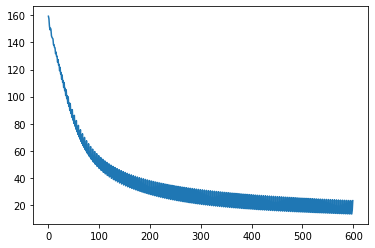

In [ ]:
plt.plot(costs_0)

# 2. RMS prop (Root Mean Square)
## This can be achieved by updating cache at each iteration
## gW = derivative_W
## cache = decay_rate * cache + (1 - decay_rate) * gW * gW
## W = W - lr*(gW / np.sqrt(cache + eps))

## Note : eps is added to avoid divide by zero

In [ ]:
W1 = W1_0.copy()
W2 = W2_0.copy()
b1 = b1_0.copy()
b2 = b2_0.copy()

cache_W2 = 0
cache_W1 = 0
cache_b2 = 0
cache_b1 = 0

decay_rate = 0.999
eps = 1e-10

cost_1 = []
acc_1 = []

In [ ]:
for i in range(epochs):
    for j in range(n_batches):
        xbatch = xtrain[j*n_batches : (j*n_batches + n_batches)]
        ybatch = ytrain_ind[j*n_batches : (j*n_batches + n_batches)]

        # forward propagation

        z , y = forward(xbatch , W1 , W2 , b1 , b2)

        # update weights
        gW2 = derivative_W2(ybatch , y ,z) + reg * W2
        cache_W2 = decay_rate*cache_W2 + (1 - decay_rate)*gW2*gW2
        W2 -= lr * (gW2 / np.sqrt(cache_W2 + eps))

        gb2 = derivative_b2(ybatch , y ) + reg * b2
        cache_b2 = decay_rate*cache_b2 + (1 - decay_rate)*gb2*gb2
        b2 -= lr * (gb2 / np.sqrt(cache_b2 + eps))

        gW1 = derivative_W1(ybatch , y , z , xbatch , W2) + reg * W1
        cache_W1 = decay_rate*cache_W1 + (1 - decay_rate)*gW1*gW1
        W1 -= lr* (gW1 / np.sqrt(cache_W1 + eps))
        
        gb1 = derivative_b1(ybatch , y , z, W2)  + reg * b1
        cache_b1 = decay_rate*cache_b1 + (1 - decay_rate)*gb1*gb1
        b1 -= lr* (gb1 / np.sqrt(cache_b1 + eps))
        
        if (j % 20 == 0):
            cost = cross_entropy(ybatch , y)
            cost_1.append(cost)
            acc  = accuracy(decode_dummies(ybatch) ,decode_dummies(y))
            acc_1.append(acc)
            print(f"i - {i} -- j - {j} -- cost - {cost} -- accuracy - {acc}")


_ , pY = forward(xtrain , W1 , W2 , b1 , b2)
acc = accuracy(ytrain , decode_dummies(pY))
print(f"train accuracy : {acc}")
_ , pY = forward(xtest , W1 , W2 , b1 , b2)
acc = accuracy(ytest , decode_dummies(pY))
print(f"test accuracy : {acc}")

i - 0 -- j - 0 -- cost - 159.54015752071305 -- accuracy - 0.08955223880597014
i - 0 -- j - 20 -- cost - 91.15399359250438 -- accuracy - 0.7611940298507462
i - 0 -- j - 40 -- cost - 68.0105835841531 -- accuracy - 0.8805970149253731
i - 0 -- j - 60 -- cost - 63.55280081381767 -- accuracy - 0.7910447761194029
i - 1 -- j - 0 -- cost - 49.70258081435662 -- accuracy - 0.8656716417910447
i - 1 -- j - 20 -- cost - 47.230735156678506 -- accuracy - 0.9104477611940298
i - 1 -- j - 40 -- cost - 43.07837321502578 -- accuracy - 0.9104477611940298
i - 1 -- j - 60 -- cost - 47.14528353948033 -- accuracy - 0.8208955223880597
i - 2 -- j - 0 -- cost - 35.274632843821436 -- accuracy - 0.8805970149253731
i - 2 -- j - 20 -- cost - 35.35301615303307 -- accuracy - 0.9253731343283582
i - 2 -- j - 40 -- cost - 34.620074083938135 -- accuracy - 0.9104477611940298
i - 2 -- j - 60 -- cost - 40.25609645766872 -- accuracy - 0.8656716417910447
i - 3 -- j - 0 -- cost - 29.034726573707598 -- accuracy - 0.895522388059701

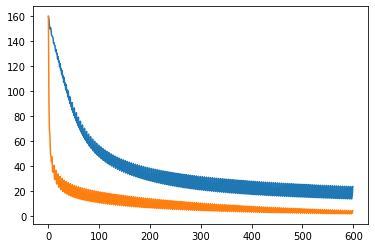

In [ ]:
plt.plot(costs_0 , label = "gradient descent")
plt.plot(cost_1 , label = "rms prop")

# 3.RMS Prop with Momentum
## This can be achieved by adding momentum to RMS prop

## gW = derivative_W
## cache = decay_rate * cache + (1 -decay_rate) * gW * gW
## dW = mu * dW - lr * gW/ sqrt(cache + eps)
## W = W + dW

## Note : eps is added to avoid divide by zero

In [ ]:
W1 = W1_0.copy()
W2 = W2_0.copy()
b1 = b1_0.copy()
b2 = b2_0.copy()

cache_W2 = 0
cache_W1 = 0
cache_b2 = 0
cache_b1 = 0

dW1 = 0
dW2 = 0
db2 = 0
db1 = 0

mu = 0.9

decay_rate = 0.999
eps = 1e-10

cost_2 = []
acc_2 = []

In [ ]:
for i in range(epochs):
    for j in range(n_batches):
        xbatch = xtrain[j*n_batches : (j*n_batches + n_batches)]
        ybatch = ytrain_ind[j*n_batches : (j*n_batches + n_batches)]
        
        # forward propagation

        z , y = forward(xbatch , W1 , W2 , b1 , b2)

        # update weights
        gW2 = derivative_W2(ybatch , y ,z) + reg * W2
        cache_W2 = decay_rate*cache_W2 + (1 - decay_rate)*gW2*gW2
        dW2 = (mu * dW2) - lr * (gW2 / np.sqrt(cache_W2 + eps))
        W2  += dW2

        gb2 = derivative_b2(ybatch , y ) + reg * b2
        cache_b2 = decay_rate*cache_b2 + (1 - decay_rate)*gb2*gb2
        db2 = (mu * db2) - lr * (gb2 / np.sqrt(cache_b2 + eps))
        b2 += db2

        gW1 = derivative_W1(ybatch , y , z , xbatch , W2) + reg * W1
        cache_W1 = decay_rate*cache_W1 + (1 - decay_rate)*gW1*gW1
        dW1 = (mu * dW1) - lr* (gW1 / np.sqrt(cache_W1 + eps))
        W1 += dW1
        
        gb1 = derivative_b1(ybatch , y , z, W2) + reg * b1
        cache_b1 = decay_rate*cache_b1 + (1 - decay_rate)*gb1*gb1
        db1  = (mu * db1) -  lr* (gb1 / np.sqrt(cache_b1 + eps))
        b1 += db1


        if (j % 20 == 0):
            cost = cross_entropy(ybatch , y)
            cost_2.append(cost)
            acc  = accuracy(decode_dummies(ybatch) ,decode_dummies(y))
            acc_2.append(acc)
            print(f"i - {i} -- j - {j} -- cost - {cost} -- accuracy - {acc}")


_ , pY = forward(xtrain , W1 , W2 , b1 , b2)
acc = accuracy(ytrain , decode_dummies(pY))
print(f"train accuracy : {acc}")
_ , pY = forward(xtest , W1 , W2 , b1 , b2)
acc = accuracy(ytest , decode_dummies(pY))
print(f"test accuracy : {acc}")


i - 0 -- j - 0 -- cost - 159.54015752071305 -- accuracy - 0.08955223880597014
i - 0 -- j - 20 -- cost - 23.022787439838883 -- accuracy - 0.8507462686567164
i - 0 -- j - 40 -- cost - 20.52702555824679 -- accuracy - 0.9402985074626866
i - 0 -- j - 60 -- cost - 26.095455924875473 -- accuracy - 0.835820895522388
i - 1 -- j - 0 -- cost - 9.224517179122426 -- accuracy - 0.9552238805970149
i - 1 -- j - 20 -- cost - 13.037797066135376 -- accuracy - 0.9104477611940298
i - 1 -- j - 40 -- cost - 11.45645343662004 -- accuracy - 0.9701492537313433
i - 1 -- j - 60 -- cost - 18.673057258097593 -- accuracy - 0.8805970149253731
i - 2 -- j - 0 -- cost - 6.783580023408447 -- accuracy - 0.9701492537313433
i - 2 -- j - 20 -- cost - 9.471395743336904 -- accuracy - 0.9253731343283582
i - 2 -- j - 40 -- cost - 8.834957458711576 -- accuracy - 0.9701492537313433
i - 2 -- j - 60 -- cost - 14.008928713711008 -- accuracy - 0.9104477611940298
i - 3 -- j - 0 -- cost - 4.986775074372126 -- accuracy - 0.97014925373134

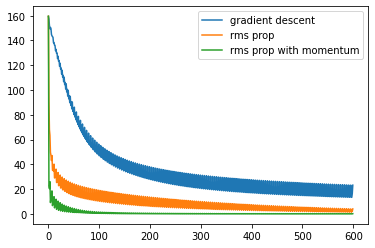

In [ ]:
plt.plot(costs_0 , label = "gradient descent")
plt.plot(cost_1 , label = "rms prop")
plt.plot(cost_2 , label = "rms prop with momentum")
plt.legend()

# 4.Adam (Adaptive Moment Estimation):
## This can be achieved by adding first moment [E(X)] and second moment [E(X^2)]
## ie. E(x) --> mean or momentum and  E(X^2) --> variance

## gW = derivative_W
## mW = decay_rate * mW + (1 - decay_rate) * gW
## vW = decay_rate1 * mW + (1 - decay_rate1) * gW * gW
# **Bias correction**
##  correction1 = 1 - decay_rate**t
##  correction2 = 1 - decay_rate1**t
##  hat_mW = mW / correction1
##  hat_vW = vW / correction2
##  t = t + 1
## W = W - lr * hat_mW / sqrt(hat_vW + eps)

## Note: since adam is biased towards zero we have to do bias correction


In [ ]:
W1 = W1_0.copy()
W2 = W2_0.copy()
b1 = b1_0.copy()
b2 = b2_0.copy()


mW1 = 0
mW2 = 0
mb2 = 0
mb1 = 0

vW1 = 0
vW2 = 0
vb2 = 0
vb1 = 0

t = 1

decay_rate = 0.9
decay_rate1 = 0.999

eps = 1e-10

lr = 0.004
cost_3 = []
acc_3 = []

In [ ]:
for i in range(epochs):
    for j in range(n_batches):
        xbatch = xtrain[j*n_batches : (j*n_batches + n_batches)]
        ybatch = ytrain_ind[j*n_batches : (j*n_batches + n_batches)]

        # forward propagation

        z , y = forward(xbatch , W1 , W2 , b1 , b2)

        # update gradient
        gW2 = derivative_W2(ybatch , y , z) + reg*W2
        gb2 = derivative_b2(ybatch , y) + reg * b2
        gW1 = derivative_W1(ybatch , y , z , xbatch , W2) + reg * W1
        gb1 = derivative_b1(ybatch , y , z , W2) + reg * b1

        # update m
        mW2 = (decay_rate * mW2) + ((1 - decay_rate) * gW2)
        mb2 = (decay_rate * mb2) + ((1 -  decay_rate) * gb2)
        mW1 = (decay_rate * mW1) + ((1 - decay_rate) * gW1)
        mb1 = (decay_rate * mb1) + ((1 -  decay_rate) * gb1)

        # update v
        vW2 = (decay_rate1 * vW2) + ((1 - decay_rate1) * gW2 * gW2)
        vb2 = (decay_rate1 * vb2) + ((1 - decay_rate1) * gb2 * gb2)
        vW1 = (decay_rate1 * vW1) + ((1 - decay_rate1) * gW1 * gW1)
        vb1 = (decay_rate1 * vb1) + ((1 - decay_rate1) * gb1 * gb1)
         
        # bias correction
        correction1 = 1 - decay_rate ** t
        hat_mW2 = mW2 / correction1
        hat_mb2 = mb2 / correction1
        hat_mW1 = mW1 / correction1  
        hat_mb1 = mb1 / correction1  

        correction2 = 1 - decay_rate1 ** t
        hat_vW2 = vW2 / correction2 
        hat_vb2 = vb2 / correction2 
        hat_vW1 = vW1 / correction2
        hat_vb1 = vb1 / correction2
        
        # update t
        t += 1

        # upadte weights
        W2 -= lr*hat_mW2 / (np.sqrt(hat_vW2 + eps))
        b2 -= lr*hat_mb2 / (np.sqrt(hat_vb2 + eps))
        W1 -= lr*hat_mW1 / (np.sqrt(hat_vW1 + eps))
        b1 -= lr*hat_mb1 / (np.sqrt(hat_vb1 + eps))

        if (j % 20 == 0):
            cost = cross_entropy(ybatch , y)
            cost_3.append(cost)
            acc  = accuracy(decode_dummies(ybatch) ,decode_dummies(y))
            acc_3.append(acc)
            print(f"i - {i} -- j - {j} -- cost - {cost} -- accuracy - {acc}")


_ , pY = forward(xtrain , W1 , W2 , b1 , b2)
acc = accuracy(ytrain , decode_dummies(pY))
print(f"train accuracy : {acc}")
_ , pY = forward(xtest , W1 , W2 , b1 , b2)
acc = accuracy(ytest , decode_dummies(pY))
print(f"test accuracy : {acc}")



i - 0 -- j - 0 -- cost - 159.54015752071305 -- accuracy - 0.08955223880597014
i - 0 -- j - 20 -- cost - 21.42066135743134 -- accuracy - 0.8805970149253731
i - 0 -- j - 40 -- cost - 19.85451584177528 -- accuracy - 0.9253731343283582
i - 0 -- j - 60 -- cost - 26.693873605507292 -- accuracy - 0.8656716417910447
i - 1 -- j - 0 -- cost - 11.874812548517014 -- accuracy - 0.9402985074626866
i - 1 -- j - 20 -- cost - 13.66174762555481 -- accuracy - 0.9402985074626866
i - 1 -- j - 40 -- cost - 7.070390692017122 -- accuracy - 0.9701492537313433
i - 1 -- j - 60 -- cost - 17.060431693074726 -- accuracy - 0.9402985074626866
i - 2 -- j - 0 -- cost - 6.465776005161802 -- accuracy - 0.9552238805970149
i - 2 -- j - 20 -- cost - 9.574661243433553 -- accuracy - 0.9701492537313433
i - 2 -- j - 40 -- cost - 6.24380409105099 -- accuracy - 0.9701492537313433
i - 2 -- j - 60 -- cost - 9.411416533037698 -- accuracy - 0.9402985074626866
i - 3 -- j - 0 -- cost - 2.6776107208696054 -- accuracy - 1.0
i - 3 -- j - 

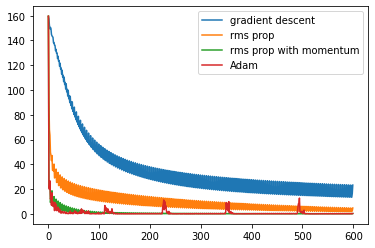

In [ ]:
plt.plot(costs_0 , label = "gradient descent")
plt.plot(cost_1 , label = "rms prop")
plt.plot(cost_2 , label = "rms prop with momentum")
plt.plot(cost_3 , label = "Adam")
plt.legend()

# Conclusion :
## From above graph we can notice that adam outperformed rms prop
## We can notice that rms prop with momentum is almost equal to adam